# Reinforcement Learning
## By Noël Jumin and Louis Maurin
### October 9, 2025

In [1]:
import numpy as np

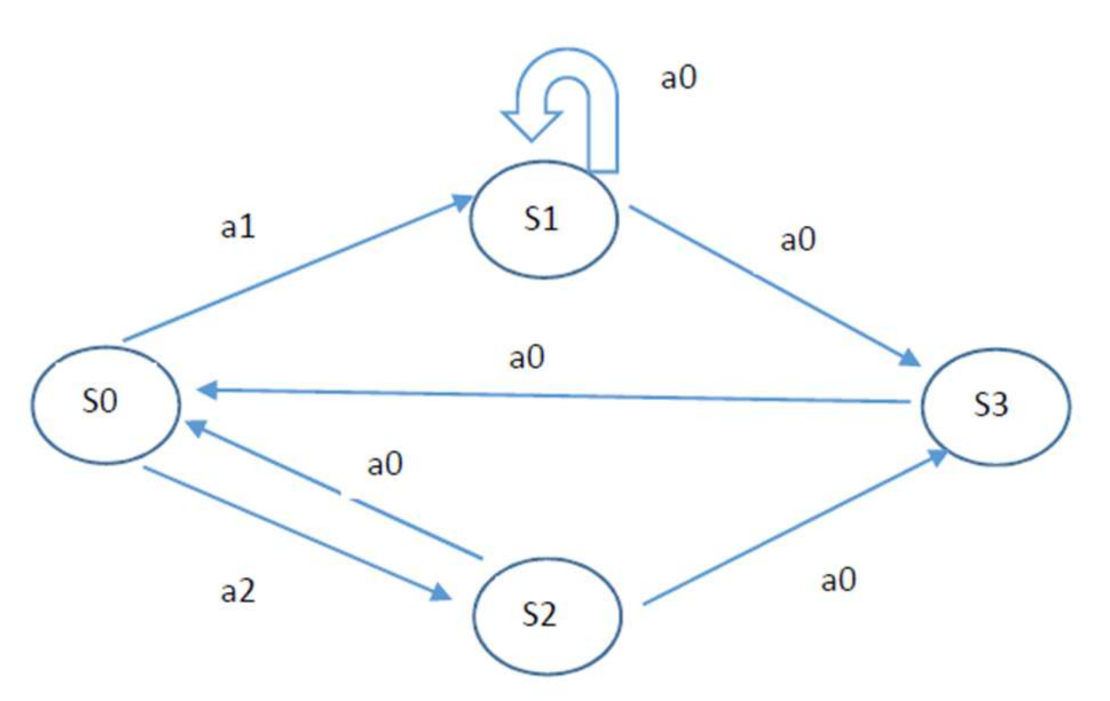


We define the transition matrices as follows:

$$
T(S,a0,S') =
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 1-x & 0 & x \\
1-y & 0 & 0 & y \\
1 & 0 & 0 & 0
\end{bmatrix}
$$

$$
T(S,a1,S') =
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

$$
T(S,a2,S') =
\begin{bmatrix}
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

With the reward vector:

$$
R = [0, 0, 1, 10]
$$

# Q1
We can so write the possible policies as:

$$
\pi_1 :
    \begin{cases}
        S_0 \rightarrow a_1 \\
        S_1 \rightarrow a_0 \\
        S_2 \rightarrow a_0 \\
        S_3 \rightarrow a_0 \\
    \end{cases}
\ \ \
\pi_2 :
    \begin{cases}
        S_0 \rightarrow a_2 \\
        S_1 \rightarrow a_0 \\
        S_2 \rightarrow a_0 \\
        S_3 \rightarrow a_0 \\
    \end{cases}
$$

# Q2
We can write the Bellman equations for the optimal value function \( $V^*$ \) as follows:
$$
V^*(S) = R(S) + \gamma \max_{a} \sum_{S'} T(S,a,S') V^*(S')
$$
Where \( $\gamma$ \) is the discount factor.

To solve for \( $V^*$ \), we can set up the equations for each state:

1. For state 0:
   $$
   \begin{aligned}
   V^*(S_0) = R(S_0) + \gamma \max(V^*(S_1), V^*(S_2)) \\
   V^*(S_0) = \gamma \max(V^*(S_1), V^*(S_2))
   \end{aligned}
   $$

2. For state 1:
    $$
    \begin{aligned}
    V^*(S_1) = R(S_1) + \gamma ((1-x)V^*(S_1) + xV^*(S_3)) \\
    V^*(S_1) = \gamma ((1-x)V^*(S_1) + xV^*(S_3))
    \end{aligned}
   $$

3. For state 2:
   $$
   \begin{aligned}
    V^*(S_2) = R(S_2) + \gamma \max((1-y)V^*(S_0) + yV^*(S_3)) \\
    V^*(S_2) = 1 + \gamma ((1-y)V^*(S_0) + yV^*(S_3))
   \end{aligned}
   $$   

4. For state 3:
   $$
    V^*(S_3) = R(S_3) + \gamma \max(V^*(S_0))\\
    V^*(S_3) = 10 + \gamma V^*(S_0)
    $$

# Q3
Now that we have these equations, we could determine a value for $x$, that for all $\gamma \in [0,1[$, and $y \in [0,1]$, $\pi^*(S_0) = a_2$.

We know that
$$\pi^*(S_0) = \text{arg max}_a \sum_{S'} T(S_0,a,S')V^*(S')$$

Hence,
$$\pi^*(S_0) =
 \begin{cases}
    a_1 \ \ \text{if} \ V^*(S_1) > V^*(S_2) \\
    a_2 \ \ \text{if} \ V^*(S_1) < V^*(S_2)
 \end{cases}
$$

So we need to find $x$ so that $V^*(S_2) > V^*(S_1)$

To do that, we'll take $x=0$ and reformulate $V^*(S_1)$ and $V^*(S_2)$ Bellman equations (Taking into account that $R(S)$ is not function of $a$) :

$$
\begin{aligned}
V^*(S_1) = \gamma ((1-x)V^*(S_1) + xV^*(S_3)) \\
V^*(S_1) = \gamma V^*(S_1) \\
(1 - \gamma) V^*(S_1) = 0 \\
V^*(S_1) = 0 \ \ \ \text{since} \ \gamma \in [0,1[ \\
\end{aligned}
$$

$$
\begin{aligned}
V^*(S_2) = \gamma ((1-y)V^*(S_0) + yV^*(S_3)) \\
V^*(S_2) = \gamma ((1-y)V^*(S_0) + y \gamma V^*(S_0)) \\
V^*(S_2) = \gamma V^*(S_0) (1-y + y \gamma) \\
V^*(S_2) = \gamma V^*(S_0) (1+y(\gamma-1)) \\
\end{aligned}
$$

So $V^*(S_2)>V^*(S_1)$ for any $y\neq 0$ and $x = 0$ is a solution.

# Q4
We can now try to determine a value for $y$, that for all $\gamma \in [0,1[$, and $x > 0$, $\pi^*(S_0) = a_1$.

As of before,
$$\pi^*(S_0) =
 \begin{cases}
    a_1 \ \ \text{if} \ V^*(S_1) > V^*(S_2) \\
    a_2 \ \ \text{if} \ V^*(S_1) < V^*(S_2)
 \end{cases}
$$

Let's suppose such a value of y exists. We call it $y_0$ and choose $y = y_0$.

We now have that for all $\gamma \in [0,1[$, and $x > 0$, $\pi^*(S_0) = a_1$ which is equivalent to $V^*(S_1) > V^*(S_2)$.

We can that write,
$$
\begin{aligned}
V^*(S_0) = \gamma V^*(S_1) \\
V^*(S_3) = 10 + \gamma^2 V^*(S_1)
\end{aligned}
$$

So,
$$
\begin{aligned}
V^*(S_1) = \gamma (1-x) V^*(S_1) + \gamma x (10 + \gamma^2 V^*(S_1)) \\
V^*(S_1) (1 + \gamma (x-1) - x \gamma^3) = 10 x \gamma \\
V^*(S_1) = \frac{10 x \gamma}{1 + \gamma (x-1) - x \gamma^3} \ \ \ ( \text{for} \ \ \ 1 + \gamma (x-1) - x \gamma^3 \neq 0 )
\end{aligned}
$$

Now using this formula, if $\gamma = 0$ then $1 + \gamma (x-1) - x \gamma^3 = 1 \neq 0$ and $V^*(S_1) = 0$.

Actually, we already had from the equations above that.
When $\gamma = 0$,
$$
\begin{aligned}
V^*(S_1) = 0 \\
V^*(S_2) = 1
\end{aligned}
$$

So $V^*(S_2) > V^*(S_1)$ and we end up with a contradiction.

So such a value of $y$ doesn't exists.

# Q5
We'll now implement our value iteration:

In [6]:
R = [0, 0, 1, 10]
gamma = 0.9 
x = 0.25
y = 0.25
tol = 1e-6

# Transition matrices
T_a0 = np.array([
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0 - x, 0.0, x],
    [1.0 - y, 0.0, 0.0, y],
    [1.0, 0.0, 0.0, 0.0],
])
T_a1 = np.array([
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
])
T_a2 = np.array([
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0],
])
T = [T_a0, T_a1, T_a2]

n_states = 4 # S0, S1, S2, S3
n_actions = len(T) # One action per transition matrix

V = np.zeros(n_states)
delta = np.inf
while delta > tol:
    V_prev = V.copy()
    for s in range(n_states):
        q_vals = [np.dot(T[a][s], V_prev) for a in range(n_actions)]
        V[s] = R[s] + gamma * max(q_vals)
    delta = np.max(np.abs(V - V_prev))

# Extract deterministic optimal policy
action_names = ['a0', 'a1', 'a2']
pi = []
for s in range(n_states):
    q_vals = [np.dot(T[a][s], V) for a in range(n_actions)]
    print(f" S{s}: q = {np.round(q_vals,6)}  -> best = {action_names[int(np.argmax(q_vals))]}")
    pi.append(action_names[int(np.argmax(q_vals))])

print("V* =", np.round(V, 6))
print("pi* =", pi)

 S0: q = [ 0.       15.761813 15.69789 ]  -> best = a1
 S1: q = [17.513126  0.        0.      ]  -> best = a0
 S2: q = [16.33099  0.       0.     ]  -> best = a0
 S3: q = [14.185631  0.        0.      ]  -> best = a0
V* = [14.185631 15.761813 15.69789  22.767067]
pi* = ['a1', 'a0', 'a0', 'a0']


To explain what appened here, $V^*$ is the calculation of reward taking in account if it will be immediate reward or not immediate but lead to a big reward.    
With $Q$, we can know from each state, what action take to get the maximum reward and so take the best path.   
With this information we know that the best option from $S_0$ is a1 and a0 for the others.   